**MAXIMIZING REVENUE FOR TAXI CAB CRIVERS THROUGH PAYMENT TYPE ANALYSIS**

***Problem Statement***

In the fast-paced taxi booking sector, making the most of revenue is essential for long term success. Our research aims wheather payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

***Research Question***

1. Is there realtionship betweeen total fare amount and   payment type?
2. Can we nudge customers towards methods that generate higher revenue for drivers, without negatively impacting customer experience?

**METHODOLOGY USED**

***Descriptive Analysis*** : Performed statistical analysis to summarize key aspects of the data, focusing on fare amounts and payment types.

***Hypothesis Testing*** : Conducted a T-test to evaluate the relationship between payment type and fare amount, testing the hypothesis that different payment methods influence fare amounts.

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv(r"/content/data.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748981,1,2015-01-10 19:01:44,2015-01-10 19:05:40,2,1.00,-73.951988,40.786217,1,N,-73.953735,40.775162,1,5.5,0.0,0.5,1.25,0.0,0.3,7.55
12748982,1,2015-01-10 19:01:44,2015-01-10 19:07:26,2,0.80,-73.982742,40.728184,1,N,-73.974976,40.720013,1,6.0,0.0,0.5,2.00,0.0,0.3,8.80
12748983,1,2015-01-10 19:01:44,2015-01-10 19:15:01,1,3.40,-73.979324,40.749550,1,N,-73.969101,40.787800,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30
12748984,1,2015-01-10 19:01:44,2015-01-10 19:17:03,1,1.30,-73.999565,40.738483,1,N,-73.981819,40.737652,1,10.5,0.0,0.5,2.25,0.0,0.3,13.55


In [3]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274898e+07,1.274899e+07
mean,1.521437e+00,1.681491e+00,1.345913e+01,-7.256184e+01,3.997282e+01,1.036901e+00,-7.260904e+01,3.999961e+01,1.386712e+00,1.190566e+01,3.082790e-01,4.977986e-01,1.853814e+00,2.434984e-01,2.831431e-01,1.510829e+01
std,4.995402e-01,1.337924e+00,9.844094e+03,1.012510e+01,5.578691e+00,6.732240e-01,9.966037e+00,5.487742e+00,4.988611e-01,1.030254e+01,5.916643e-01,3.534229e-02,1.106432e+03,1.527171e+00,6.908633e-02,1.106503e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219258e+02,0.000000e+00,1.000000e+00,-7.401667e+02,-9.029157e+00,1.000000e+00,-4.500000e+02,-7.900000e+01,-5.000000e-01,-9.242000e+01,-2.600000e+01,0.000000e+00,-4.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399168e+01,4.073554e+01,1.000000e+00,-7.399120e+01,4.073436e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,1.000000e+00,1.680000e+00,-7.398160e+01,4.075314e+01,1.000000e+00,-7.397976e+01,4.075362e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,-7.396662e+01,4.076757e+01,1.000000e+00,-7.396246e+01,4.076880e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.630000e+01
max,2.000000e+00,9.000000e+00,1.542000e+07,7.866265e+01,4.047000e+02,9.900000e+01,8.527402e+01,4.595333e+02,5.000000e+00,4.008000e+03,9.999900e+02,5.000000e-01,3.950589e+06,1.450090e+03,3.000000e-01,3.950612e+06


**Exploratory Data Analysis**

In [4]:
df.shape

(12748986, 19)

In [5]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,18.050000
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80,19.833333
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,10.050000
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,1.866667
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,19.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748981,1,2015-01-10 19:01:44,2015-01-10 19:05:40,2,1.00,-73.951988,40.786217,1,N,-73.953735,40.775162,1,5.5,0.0,0.5,1.25,0.0,0.3,7.55,3.933333
12748982,1,2015-01-10 19:01:44,2015-01-10 19:07:26,2,0.80,-73.982742,40.728184,1,N,-73.974976,40.720013,1,6.0,0.0,0.5,2.00,0.0,0.3,8.80,5.700000
12748983,1,2015-01-10 19:01:44,2015-01-10 19:15:01,1,3.40,-73.979324,40.749550,1,N,-73.969101,40.787800,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30,13.283333
12748984,1,2015-01-10 19:01:44,2015-01-10 19:17:03,1,1.30,-73.999565,40.738483,1,N,-73.981819,40.737652,1,10.5,0.0,0.5,2.25,0.0,0.3,13.55,15.316667


**Data Overview**

For analysis, we concentrated solely on the relevant columns essential for our investigation.

Relevant columns used for analysis:
- passenger_count
- payment_type(card or cash)
- fare_amount
- trip_distance(miles)
- duration(minutes)

In [8]:
data=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [9]:
data.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [10]:
data[data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
413,1,1,6.5,0.8,7.950000
1277,1,1,7.0,1.1,8.416667
1559,1,1,8.0,1.4,9.800000
1860,1,1,5.5,1.1,3.850000
2009,1,2,4.0,0.6,2.516667
...,...,...,...,...,...
12748981,2,1,5.5,1.0,3.933333
12748982,2,1,6.0,0.8,5.700000
12748983,1,2,13.5,3.4,13.283333
12748984,1,1,10.5,1.3,15.316667


In [11]:
data.drop_duplicates(inplace=True)
data.shape

(4818559, 5)

In [12]:
data['passenger_count'].value_counts(normalize=True) # to chcek what % each value is contributing to the total

passenger_count
1    0.522535
2    0.186238
5    0.101820
3    0.075145
6    0.072250
4    0.040720
0    0.001284
9    0.000002
8    0.000002
7    0.000002
Name: proportion, dtype: float64

In [13]:
data['payment_type'].value_counts()

payment_type
1    2905366
2    1876448
3      26559
4      10184
5          2
Name: count, dtype: int64

In [14]:
data = data[data['payment_type']<3]
data=data[data['passenger_count']>0 & (data['passenger_count']<6)]

In [15]:
data.shape

(4775740, 5)

In [16]:
data['payment_type'].replace([1,2],['Card','Cash'], inplace=True)
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,12.0,1.59,18.050000
1,1,Card,14.5,3.30,19.833333
2,1,Cash,9.5,1.80,10.050000
3,1,Cash,3.5,0.50,1.866667
4,1,Cash,15.0,3.00,19.316667
...,...,...,...,...,...
12748955,1,Card,40.0,10.71,44.016667
12748957,6,Cash,17.0,2.36,26.683333
12748958,5,Cash,14.5,3.88,14.166667
12748959,6,Card,11.5,1.69,15.900000


In [17]:
data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,4.775740e+06,4.775740e+06,4.775740e+06,4.775740e+06
mean,2.235471e+00,1.765928e+01,3.249153e+01,2.288904e+01
std,1.671782e+00,1.378479e+01,1.604967e+04,1.060782e+03
min,1.000000e+00,-4.500000e+02,0.000000e+00,-1.211017e+03
25%,1.000000e+00,9.000000e+00,1.660000e+00,9.966667e+00
50%,1.000000e+00,1.350000e+01,3.030000e+00,1.566667e+01
75%,3.000000e+00,2.150000e+01,5.800000e+00,2.310000e+01
max,9.000000e+00,4.008000e+03,1.542000e+07,5.485556e+05


In [18]:
data=data[data['fare_amount']>0]
data=data[data['trip_distance']>0]
data=data[data['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d40333a2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d414cd2690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3fbaa3350>],
 'medians': [<matplotlib.lines.Line2D at 0x1d414cd0d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d414cd1890>],
 'means': []}

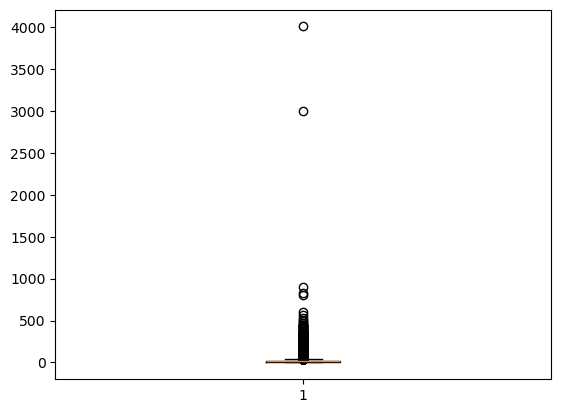

In [19]:
plt.boxplot(data['fare_amount'])

In [20]:
for col in ['fare_amount','trip_distance','duration']:
    q1= data[col].quantile(0.25)
    q3 =data[col].quantile(0.75)
    IQR=q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    data= data[(data[col]>= lower_bound) & (data[col]<=upper_bound)]

In [21]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,12.0,1.59,18.050000
1,1,Card,14.5,3.30,19.833333
2,1,Cash,9.5,1.80,10.050000
3,1,Cash,3.5,0.50,1.866667
4,1,Cash,15.0,3.00,19.316667
...,...,...,...,...,...
12748952,2,Card,11.0,2.21,12.616667
12748957,6,Cash,17.0,2.36,26.683333
12748958,5,Cash,14.5,3.88,14.166667
12748959,6,Card,11.5,1.69,15.900000


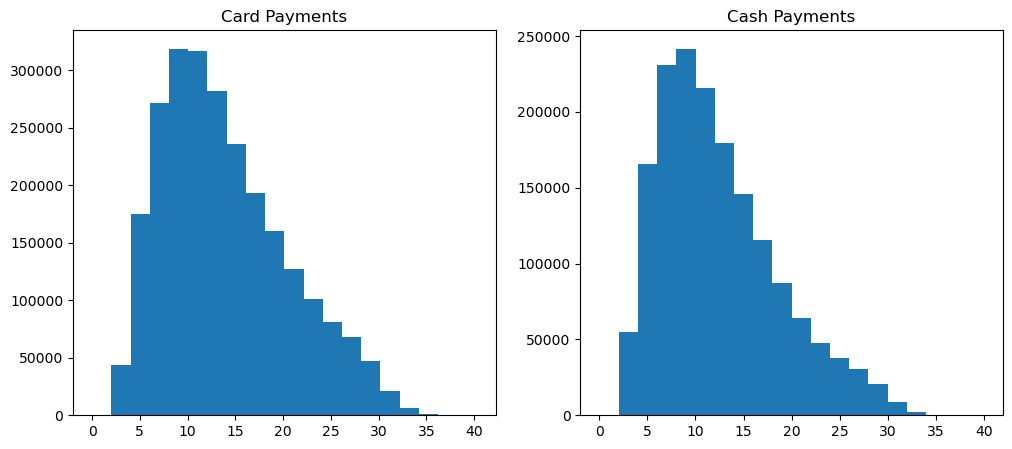

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data[data['payment_type']=='Card']['fare_amount'], bins=20)
plt.title("Card Payments")

plt.subplot(1,2,2)
plt.hist(data[data['payment_type']=='Cash']['fare_amount'], bins=20)
plt.title("Cash Payments")

plt.show()


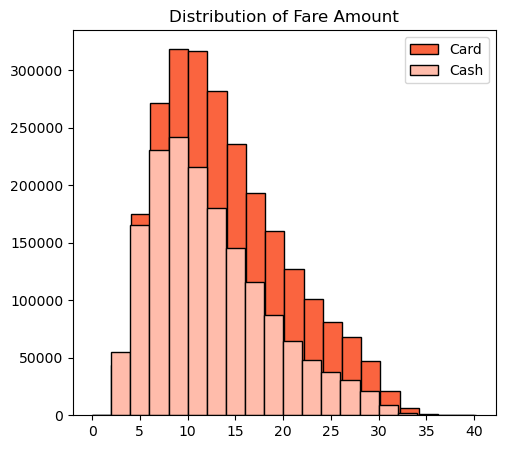

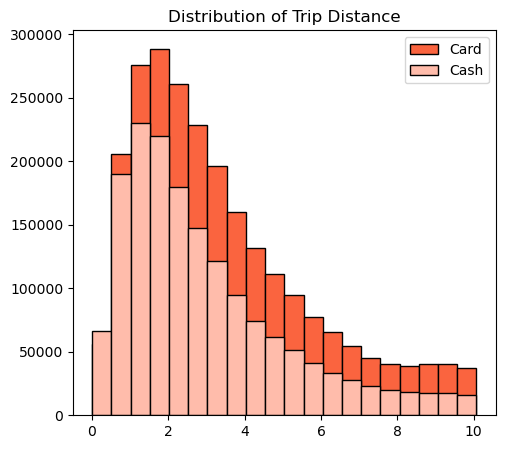

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(data[data['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F', label='Card')
plt.hist(data[data['payment_type']=='Cash']['fare_amount'],histtype='barstacked', bins=20, edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Trip Distance')
plt.hist(data[data['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F', label='Card')
plt.hist(data[data['payment_type']=='Cash']['trip_distance'],histtype='barstacked', bins=20, edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [24]:
data.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           14.090684  6.525194      3.434559  2.322283
Cash           12.666316  6.197196      2.964899  2.160088

**Insights Drawn**

- Customers paying with card tend to have a slightly higher average trip distance and faree amount compared too those ppaying with cash

- This also indicates that the customers prefer to pay more with cards when they have high fare amount and long trip distance.

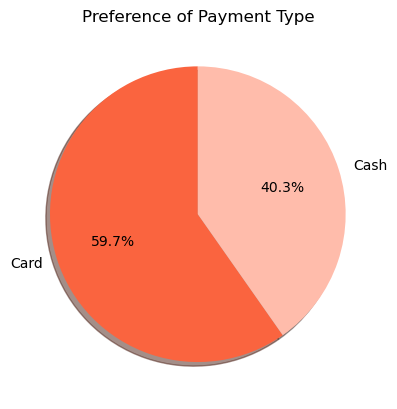

In [25]:
plt.title('Preference of Payment Type')
plt.pie(data['payment_type'].value_counts(normalize=True), labels=data['payment_type'].value_counts().index , startangle=90, shadow=True, autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

**Observation**
- The proportion of customers paying with card is significantly higher than those paying with cash.

**Insight Drawn**
- Strong preference among customers for using card payments over cash, potentially due to concenience, security or incentives offered for cash transactions.()

In [26]:
passenger_count = (
    data.groupby(['payment_type', 'passenger_count'])['passenger_count']
        .count()
        .reset_index(name='count')
)


In [27]:
passenger_count['perc']= (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1222262,29.822877
1,Card,2,462728,11.290444
2,Card,3,193223,4.714591
3,Card,4,100501,2.452198
4,Card,5,273696,6.678112
5,Card,6,196027,4.783008
6,Card,7,5,0.000122
7,Card,8,2,0.000049
8,Card,9,1,0.000024
9,Cash,1,815829,19.906017


In [31]:
data_card_cash=pd.DataFrame(columns=['payment_type',1,2,3,4,5,6,7,8,9])
data_card_cash['payment_type'] = ['Card','Cash']

card_values = passenger_count[passenger_count['payment_type']=='Card']['perc'].values
cash_values = passenger_count[passenger_count['payment_type']=='Cash']['perc'].values

data_card_cash.iloc[0,1:1+len(card_values)] = card_values
data_card_cash.iloc[1,1:1+len(cash_values)] = cash_values
data_card_cash

,payment_type,1,2,3,4,5,6,7,8,9
0,Card,29.822877,11.290444,4.714591,2.452198,6.678112,4.783008,0.000122,0.000049,0.000024
1,Cash,19.906017,7.670596,3.339617,1.950589,4.296429,3.095278,0.000049,NaN,NaN


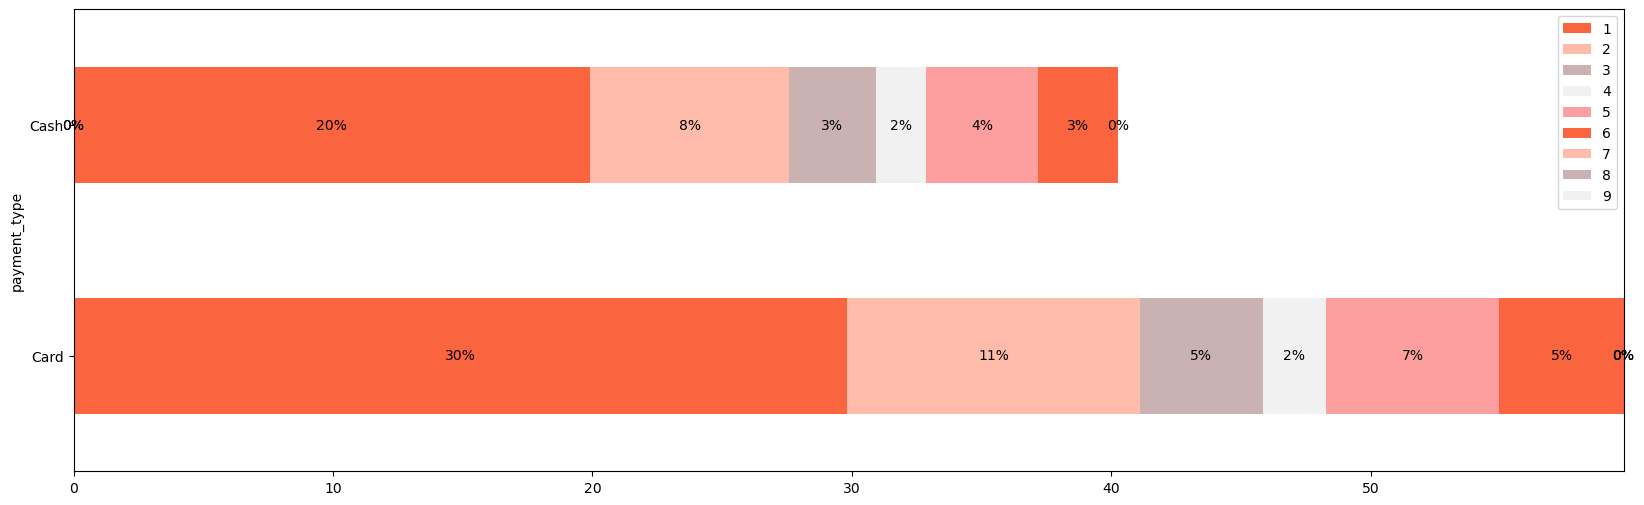

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

# Draw the bar chart on the same axes
data_card_cash.plot(x='payment_type', kind='barh', stacked=True, color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'], ax=ax)

# Add labels to each bar segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

**Observations**

- Among card payments, rides with a single passenger comprise the largest proportion, constituting 40.08% of all card transactions. 
- Cash payments are also predominantly associated with single passenger rides, making up 20.04% of all cash transactions

**Insights**

- There is a noticeable decrease in the percentage of transactions as the passenger count increases, suggesting that larger groups are less likely to use taxis or may opt alternative payment methods.

**HYPOTHESIS TESTING**

Null Hypothesis: There is no diff in avg fare between customers who use credit card and customers who use cash

Alternative Hypothesis: There is diff in avg fare between customers who use credit cards and customers who use cash

In [ ]:
card_sample=data[data['payment_type']=='Card']['fare_amount']
cash_sample=data[data['payment_type']=='Cash']['fare_amount']

In [ ]:
t_stat, p_value = stats.ttest_ind(cash_sample, card_sample, equal_var=False)  # Welch's t-test

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -223.35954683414099
P-value: 0.0


**Insights drawn**

- A negative t means that the cash sample’s mean is less than the card sample’s mean.

- A p-value of 0.0 is extremely much smaller than any typical significance level (like 0.05). This means we can reject the null hypothesis


**CONCLUSION**

- There is a significant relationship between total fare amount and payment method type.

- Customers paying by card have a higher average fare than those paying by cash.

- The difference is statistically significant (p-value ≈ 0).

**RECOMMENDATIONS**

- Encourage customers to pay with credit cards to capitalize on the potential for generating more revenue for taxi drivers.

- Implement strategies such as offering incentives or discounts for credit card transactions to incentivize customers to choose this payment method.

- Provide seamless and secure credit card payment options to enhance customer convenience and encourage adoption of this preffered payment method.